# Project for FINAL INTERNSHIP

# ------------------------------------- Red Wine Quality --------------------------------------------

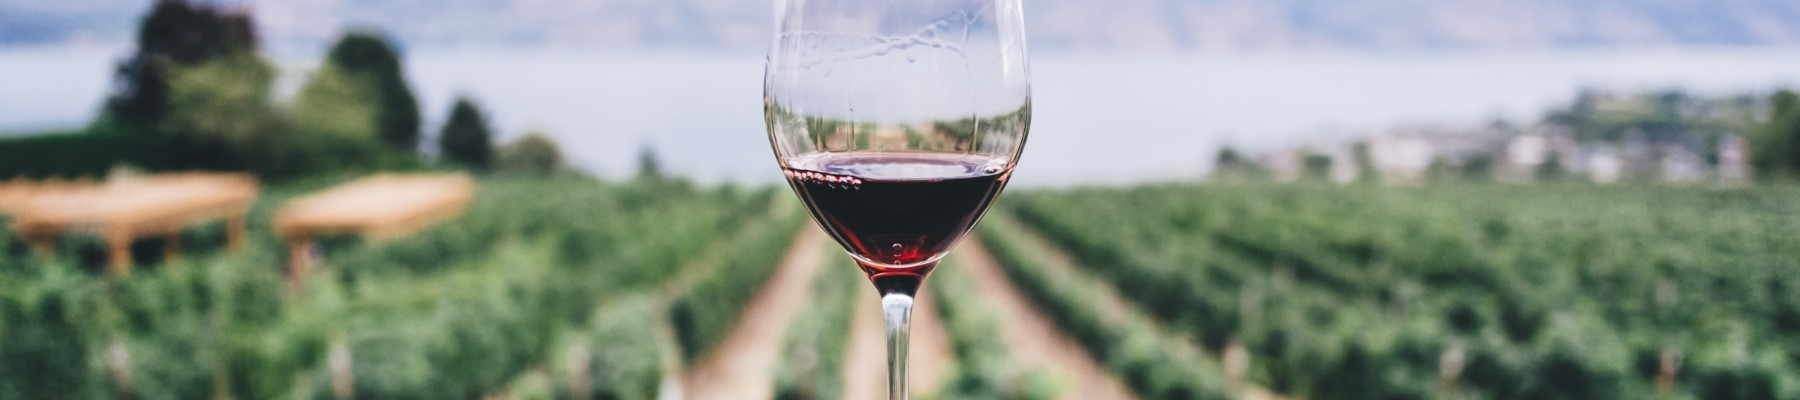

In [1]:
from IPython.display import Image
Image(filename='red-wine-quality.jpg') 

In [2]:
import numpy as np # for creating nd array objects
import pandas as pd # for data cleaning
import matplotlib.pyplot as plt # for data exploration 
import seaborn as sns # for data visualization
%matplotlib inline

# for data preprocessing
from sklearn.preprocessing import StandardScaler

# for data modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# for calculating the accuracy of the model
from sklearn.metrics import f1_score,accuracy_score

# for cross-validation of the models
from sklearn.model_selection import cross_val_score

## Introduction 

This dataset is related to red variants of the Portuguese “Vinho Verde” wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The input features are as follows:

-> fixed acidity - most acids involved with wine or fixed or nonvolatile (do not evaporate readily);

-> volatile acidity - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste;

-> citric acid - found in small quantities, citric acid can add ‘freshness’ and flavor to wines;

-> residual sugar - the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet;

-> chlorides - the amount of salt in the wine;

-> free sulfur dioxide - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine;

-> total sulfur dioxide - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine;

-> density - the density of water is close to that of water depending on the percent alcohol and sugar content;

-> pH - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale;

-> sulphates - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

-> alcohol - the percent alcohol content of the wine;

The output feature is:

-> quality - output variable (based on sensory data, score between 0 and 10);

In [3]:
# Importing the data set
df = pd.read_csv("red_wine_quality.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exploratory data analysis

In [5]:
df.shape

(1599, 12)

Checking for null values

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are 1599 observations in the dataset. 

Also, this dataset has no missing values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


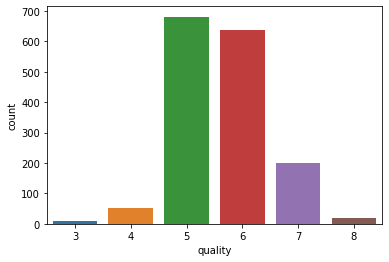

In [9]:
sns.countplot(df.quality);

From the above countplot, it is clear that  the output variable - quality have only six possible values, i.e. (3,4,5,6,7,8)

## Data visualization

### Numerical Columns data distribution

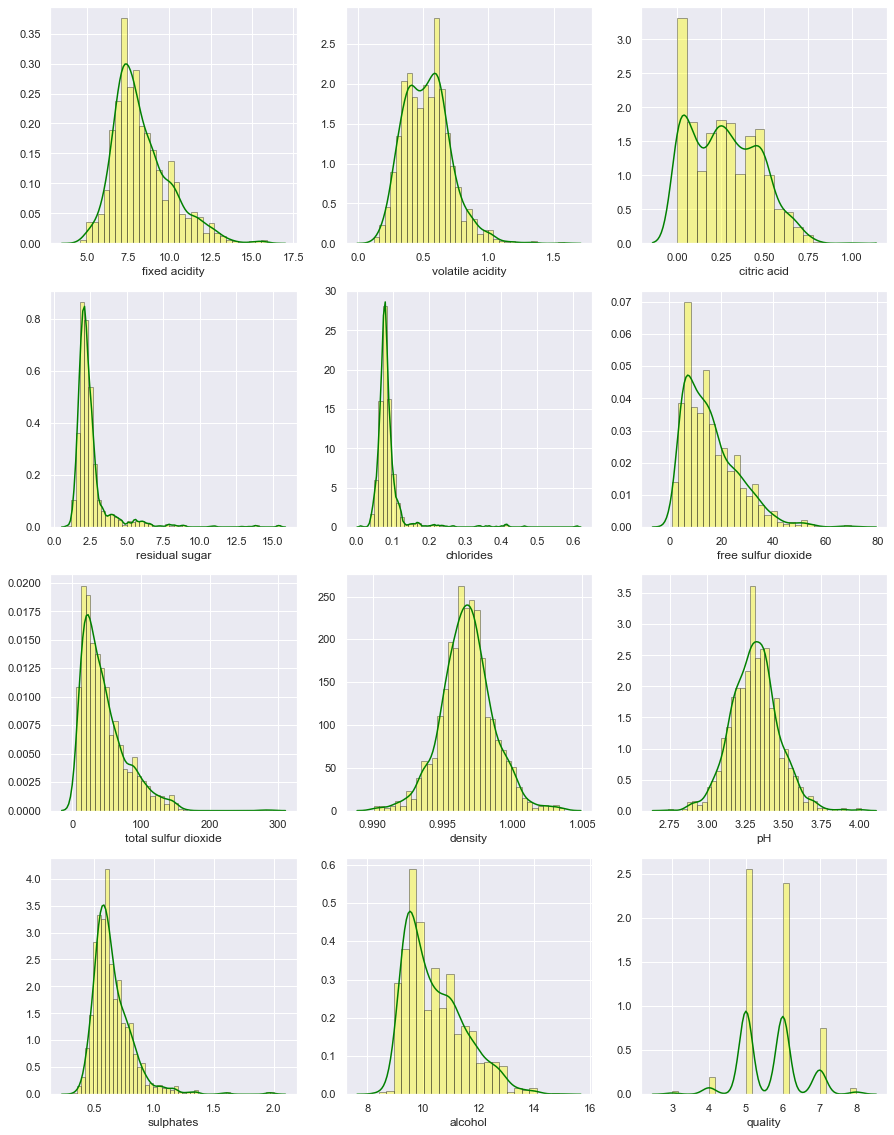

In [10]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.distplot(df[col],hist_kws=dict(edgecolor="k", linewidth=1,color='yellow'),color='green')
    cnt+=1
plt.show()  

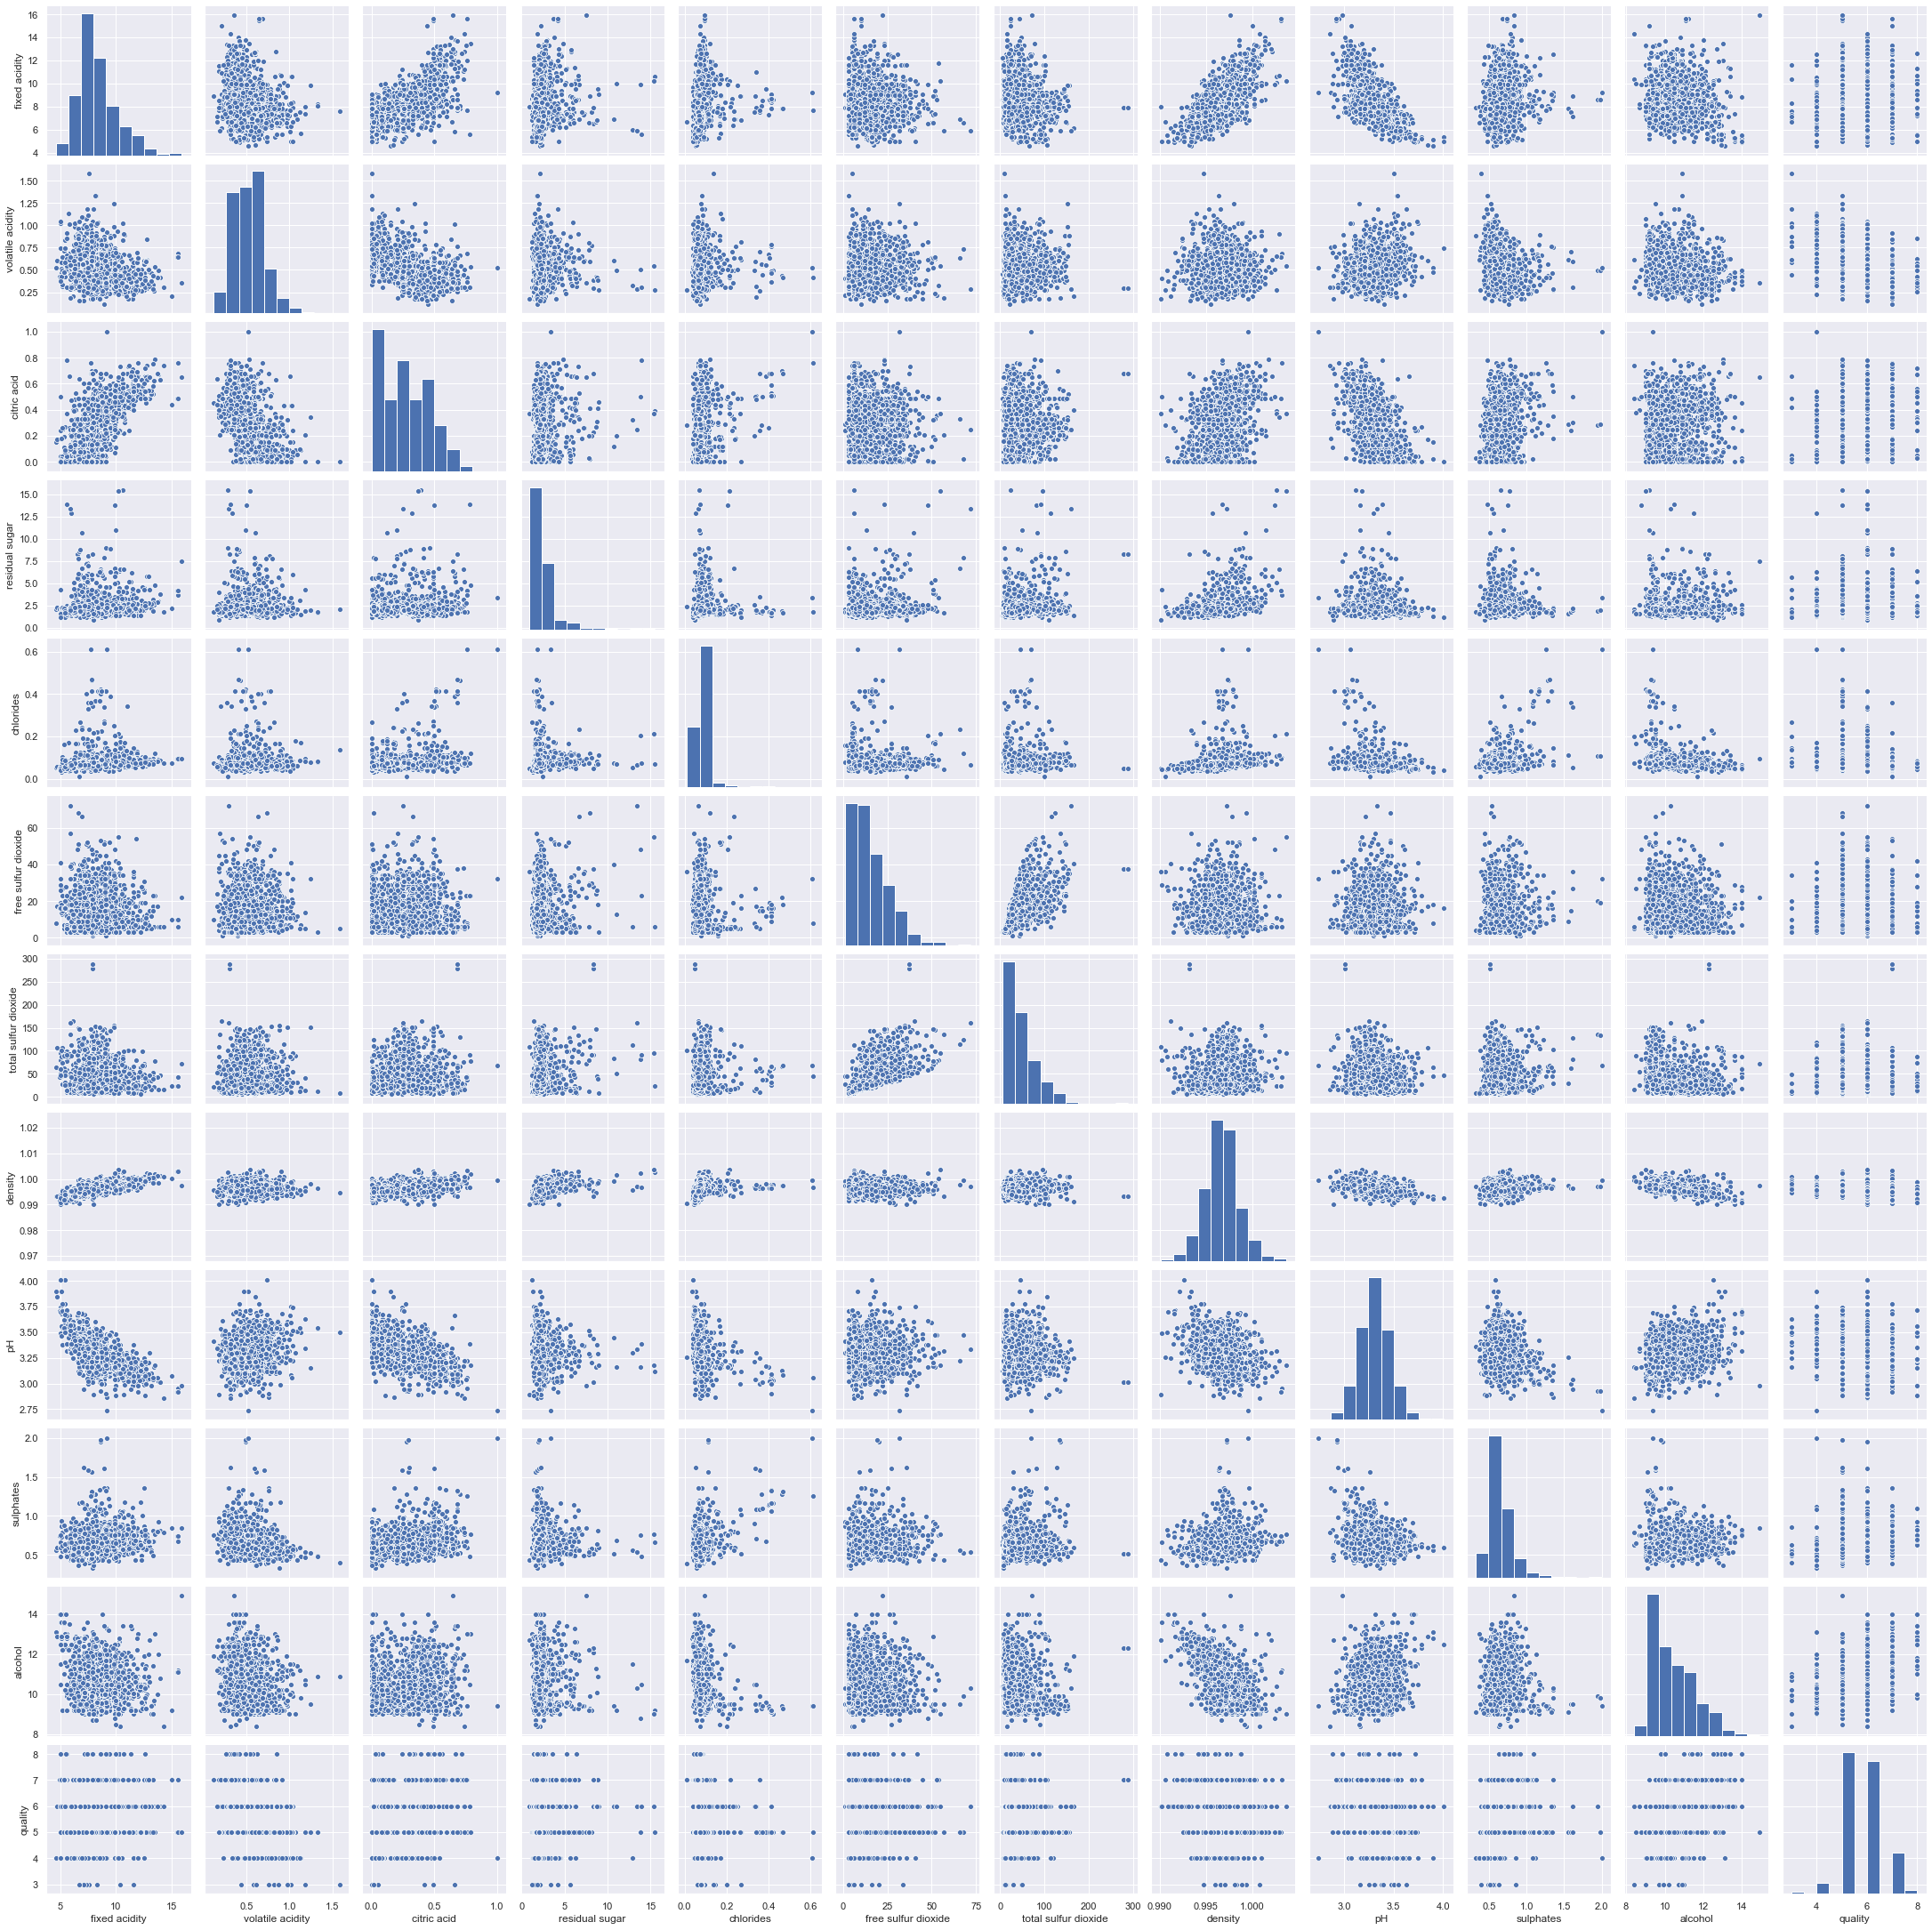

In [11]:
sns.pairplot(df);

A linear relationship can be observed for :

1. fixed acidity vs density
2. fixed acidity vs pH
3. total sulfur dioxide vs free sulfur dioxide

However 'quality' does not seem to be directly related to any other feature

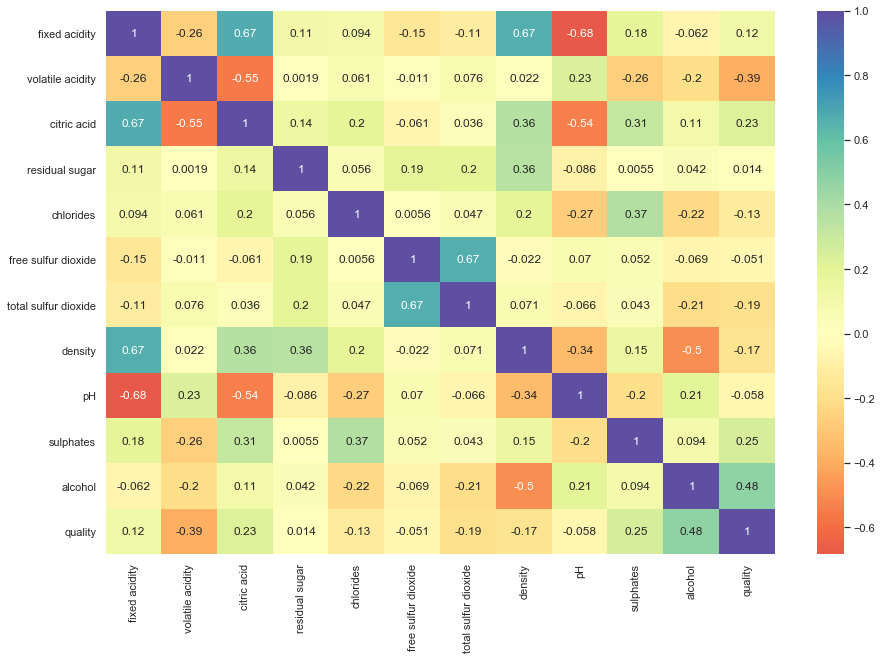

In [12]:
fig = plt.figure(figsize = [15,10])
sns.heatmap(df.corr(),annot = True,cmap = 'Spectral', center = 0)
plt.show()

A high positive correlation of 0.67 is observed between :

1. fixed acidity & citric acid
2. fixed acidity & density
3. free sulfur dioxide & total sulfur dioxide

fixed acidity & pH are negatively correlated with a high absolute magnitude of 0.68 .

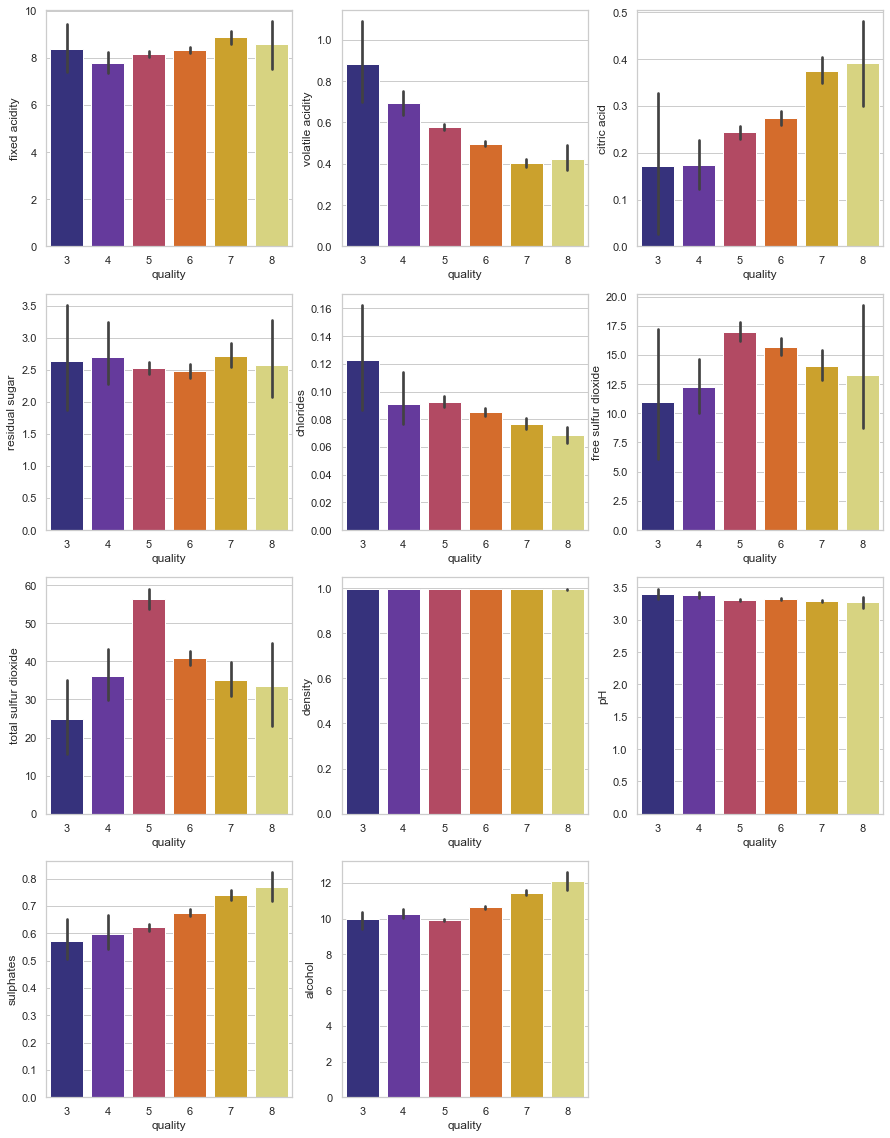

In [13]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15,20])
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.barplot(data = df, x = 'quality', y = col, palette = 'CMRmap')
    cnt+=1
plt.show() 

An increase is observed in the following as the wine quality increases :

1. citric acid
2. sulphates
3. alcohol

An decrease is observed in the following as the wine quality increases :

1. volatile acidity
2. chlorides
3. pH


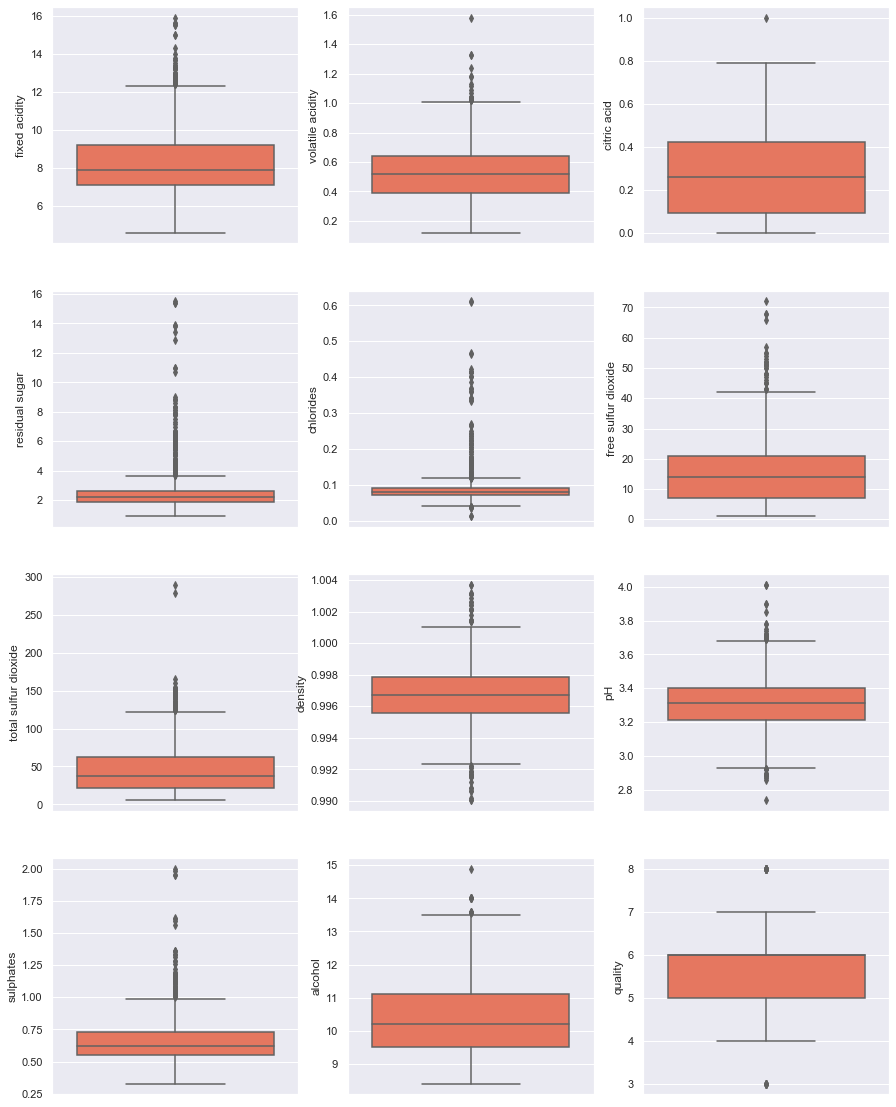

In [14]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.boxplot(data = df, y = col, palette = 'Reds')
    cnt+=1
plt.show()

There does not exists extreme differences between the outliers & upper & lower extremes.

Now, we assume that a wine with quality > 6 id 'good' [1] and others are 'bad' or 'ordinary' [0].

In [15]:
df['quality'] = df.quality.apply(lambda x : 1 if x > 6 else 0)

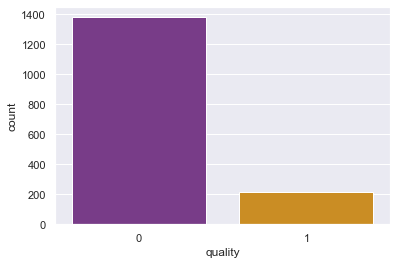

In [16]:
sns.countplot(data = df, x = 'quality', palette = 'CMRmap');


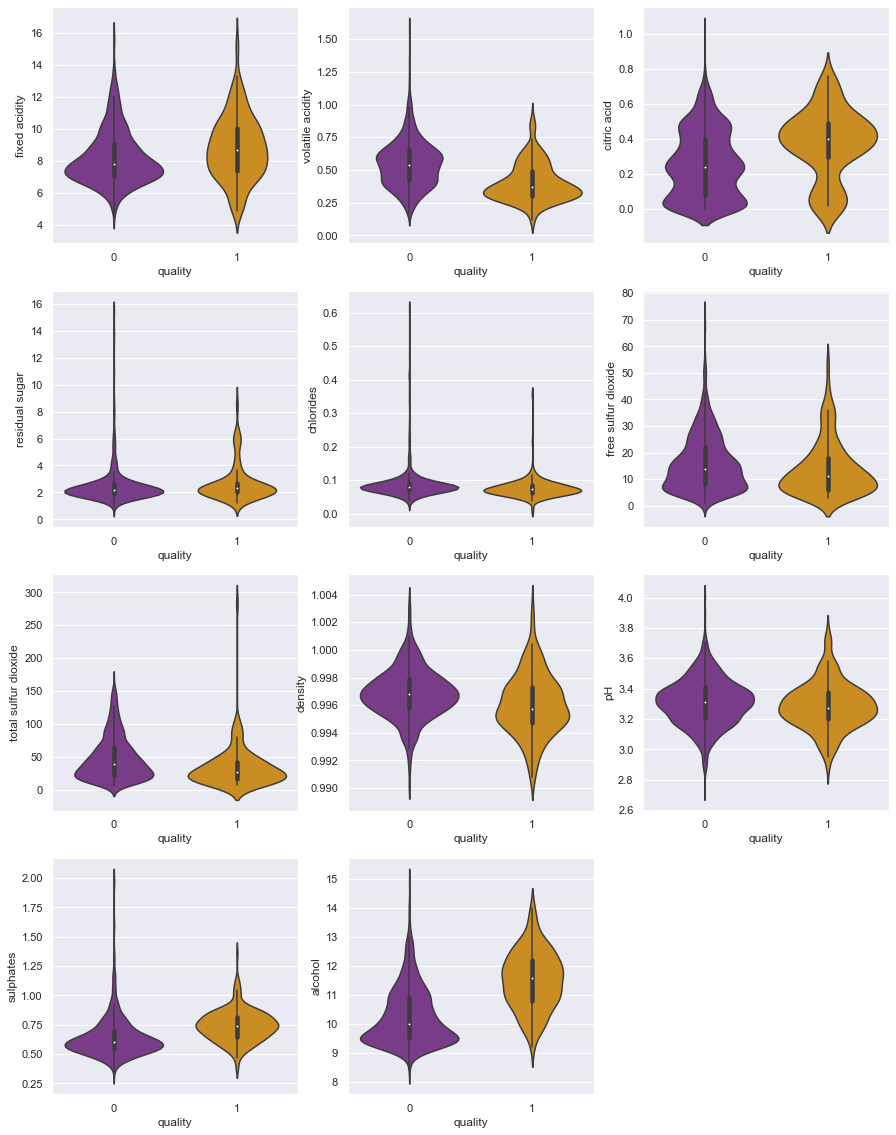

In [17]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.violinplot(x="quality", y=col, data=df, palette = 'CMRmap')
    cnt+=1
plt.show()


In [18]:
df.corr()['quality'].sort_values()[:-1]

volatile acidity       -0.270712
density                -0.150460
total sulfur dioxide   -0.139517
chlorides              -0.097308
free sulfur dioxide    -0.071747
pH                     -0.057283
residual sugar          0.047779
fixed acidity           0.120061
sulphates               0.199485
citric acid             0.214716
alcohol                 0.407315
Name: quality, dtype: float64

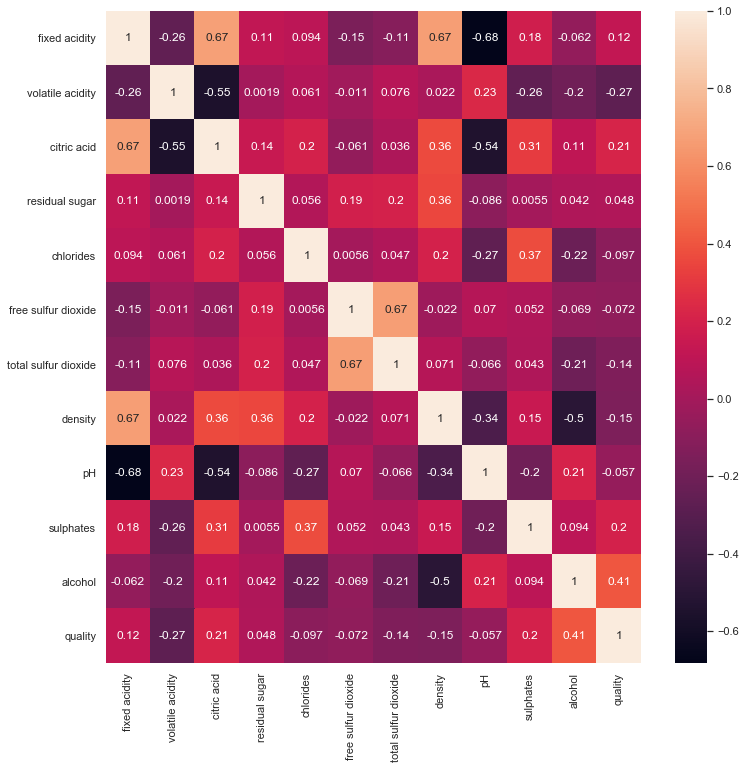

In [19]:
dataset = df.copy()
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(),annot=True);

We can observe quality is highly correlated with volatile acidity and alcohol features.

## Standardization

In [20]:
X = df.drop('quality',axis=1)
y = df.quality
scaled_X = pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.3,shuffle=True,random_state=42)
x_train.shape,x_test.shape

((1119, 11), (480, 11))

## Applying various Models

In [21]:


classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machines' : SVC(),
    'K-nearest Neighbors' : KNeighborsClassifier()
    }
results=pd.DataFrame(columns=['Accuracy in %','F1-score'])
for method,func in classifiers.items():
    func.fit(x_train,y_train)
    pred = func.predict(x_test)
    results.loc[method]= [100*np.round(accuracy_score(y_test,pred),decimals=4),
                         round(f1_score(y_test,pred),2)]
results

,Accuracy in %,F1-score
Logistic Regression,86.46,0.38
Decision Tree,86.04,0.56
Random Forest,89.17,0.54
Support Vector Machines,88.33,0.43
K-nearest Neighbors,87.08,0.49


# Evaluation using Random Forest model.

Since Random Forest regression model gave the highest accuracy.

In [22]:
# Using Cross Validation

rfc_eval = cross_val_score(estimator = RandomForestClassifier(), X = x_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9133365508365507

### Hence, Random Forest Model can be used to predict whether a wine is of good quality or bad quality from the given dataset.